In [2]:
import pandas as pd
df = pd.read_csv('mldata.csv')
df.head()

,ID,Name,Gender,Age,Height,Weight,Year,Region,Region Code,Region Notes,Season,Games,Hosting City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,1992,China,CHN,NaN,Summer,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,2012,China,CHN,NaN,Summer,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,1920,Denmark,DEN,NaN,Summer,1920 Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,1900,Denmark,DEN,NaN,Summer,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,1988,Netherlands,NED,NaN,Winter,1988 Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [3]:
df['Gender'] = df['Gender'].replace("M", 1)
df['Gender'] = df['Gender'].replace("F", 0)
df.head()

,ID,Name,Gender,Age,Height,Weight,Year,Region,Region Code,Region Notes,Season,Games,Hosting City,Sport,Event,Medal
0,1,A Dijiang,1,24.0,180.0,80.0,1992,China,CHN,NaN,Summer,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,1,23.0,170.0,60.0,2012,China,CHN,NaN,Summer,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,1,24.0,NaN,NaN,1920,Denmark,DEN,NaN,Summer,1920 Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,1,34.0,NaN,NaN,1900,Denmark,DEN,NaN,Summer,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,0,21.0,185.0,82.0,1988,Netherlands,NED,NaN,Winter,1988 Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
#Selection of input and output variables
X = df[['Year' , 'Gender']]
y = df[ 'Season']

In [5]:
X.head()

,Year,Gender
0,1992,1
1,2012,1
2,1920,1
3,1900,1
4,1988,0


In [6]:
 y.head()

0    Summer
1    Summer
2    Summer
3    Summer
4    Winter
Name: Season, dtype: object

In [7]:
# Machine learning alogrithm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

#create and fit model
model = DecisionTreeClassifier().fit(X,y)

#Prediction
model.predict([[1992, 1]])

C:\Users\mirfa\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Summer'], dtype=object)

In [8]:
#How to measure the accuracy of our model
#Split data into test and train (80/20)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #80% training data and 20% test data

#create a model 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predicted_values = model.predict(X_test)
predicted_values

#Checking Score
score = accuracy_score(y_test, predicted_values)
score
  

0.9123266450280318

In [9]:
#How to train and save your model

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import joblib

model = DecisionTreeClassifier().fit(X, y)
joblib.dump(model, "Season.joblib")

['Season.joblib']

In [10]:
#Graph
import graphviz
from sklearn import tree
model = DecisionTreeClassifier().fit(X,y)
#graphic evavalution
tree.export_graphviz(model,
                    out_file="Season.dot",
                    feature_names=['Year','Gender'],
                    class_names = sorted(y.unique()),
                    label = 'all',
                    rounded=True,
                    filled=True)


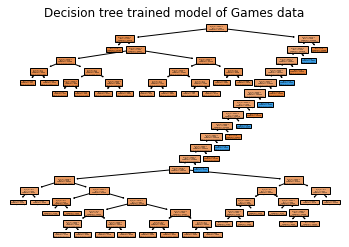

In [12]:
plot_tree(model, filled=True)
plt.title("Decision tree trained model of Games data")
plt.show()